# **MÓDULO 18 - Pratique**
# Regressão Linear

Agora que aprendemos como aplicar a regressão linear simples e múltipla, colocaremos em prática os conceitos vistos na aula.

Temos aqui uma base de imóveis para alugar, precisamos desenvolver um modelo de regressão linear múltipla para conseguir prever o preço de imóveis dadas as variáveis independentes do nosso modelo.

**Atenção! Esse é seu primeiro modelo, caso tenha dificuldade conte com a ajuda da tutoria**

Você notará que alguns códigos já estão presentes para facilitar a construção de vocês.

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
df = pd.read_csv("ALUGUEL_MOD12.csv", delimiter=';')

df.head(10)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
5,500,380,66,2,1,0,1
6,550,100,48,2,2,1,1
7,600,110,46,2,2,1,1
8,600,100,49,2,2,1,1
9,600,325,50,2,2,1,1


Legenda dos dados:

*   **Valor_Aluguel** : valor Total pago no aluguel

*   **Valor_Condominio** : Valor do Condomínio.

*   **Metragem** : Metragem do Apartamento.

*   **N_Quartos** : Número de Quartos do Imóvel.

*   **N_banheiros** : Número de banheiros.

*   **N_Suites** : Número de Suítes.

*   **N_Vagas** : Número de Vagas.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [5]:
#Seu código aqui
df.info()

# Verificando dados faltantes
df.isnull().sum()

# Percentual de dados faltantes
(df.isnull().sum() / df.shape[0]) * 100



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7203 entries, 0 to 7202
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Valor_Aluguel     7203 non-null   int64
 1   Valor_Condominio  7203 non-null   int64
 2   Metragem          7203 non-null   int64
 3   N_Quartos         7203 non-null   int64
 4   N_banheiros       7203 non-null   int64
 5   N_Suites          7203 non-null   int64
 6   N_Vagas           7203 non-null   int64
dtypes: int64(7)
memory usage: 394.0 KB


Valor_Aluguel       0.0
Valor_Condominio    0.0
Metragem            0.0
N_Quartos           0.0
N_banheiros         0.0
N_Suites            0.0
N_Vagas             0.0
dtype: float64

# 2 - Realize a segunda etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.


B) Caso note uma variável que te pareça conter outliers realiza a análise e tratamento desses dados, justificando a escolha do método utilizado.

C) Realize a análise bivariada dos dados. Faça uso de pelo menos 3 gráficos e traga insights acerca do analisado.

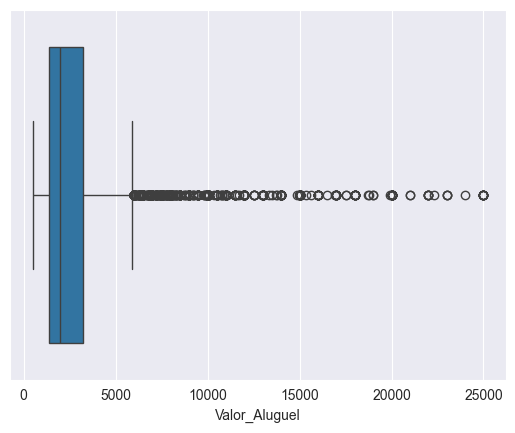

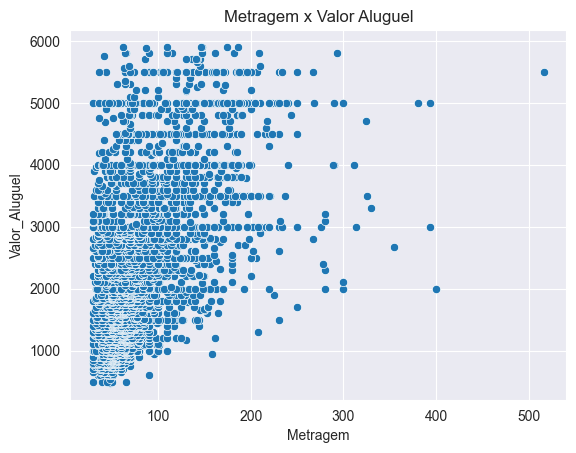

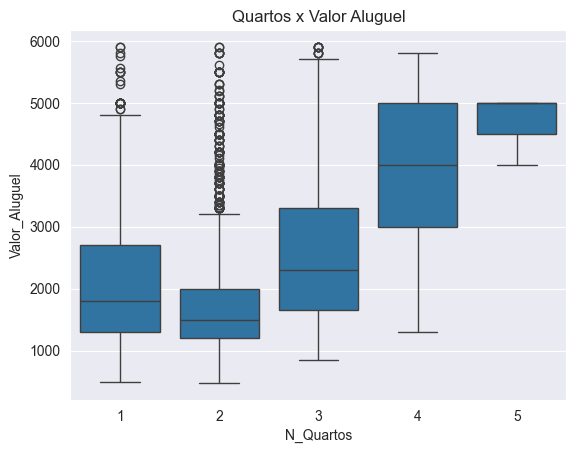

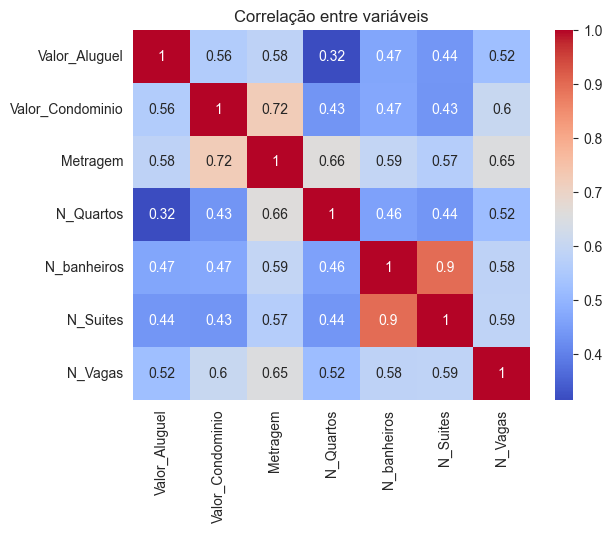

In [6]:
#Seu código aqui


sns.boxplot(x=df['Valor_Aluguel'])
plt.show()

q1 = df['Valor_Aluguel'].quantile(0.25)
q3 = df['Valor_Aluguel'].quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

df = df[(df['Valor_Aluguel'] >= limite_inferior) & (df['Valor_Aluguel'] <= limite_superior)]

df.describe()

# 1 - Dispersão metragem vs valor aluguel
sns.scatterplot(x='Metragem', y='Valor_Aluguel', data=df)
plt.title('Metragem x Valor Aluguel')
plt.show()

# 2 - Boxplot número de quartos vs valor aluguel
sns.boxplot(x='N_Quartos', y='Valor_Aluguel', data=df)
plt.title('Quartos x Valor Aluguel')
plt.show()

# 3 - Heatmap de correlação
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre variáveis')
plt.show()


# 3 - Realize a terceira etapa de pré processamento dos dados.

A) Comece pela correlação, que sabemos ser uma parte importante para nosso pré processamento e análise. Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.




In [7]:
#Seu código aqui
df.corr()['Valor_Aluguel'].sort_values(ascending=False)



Valor_Aluguel       1.000000
Metragem            0.583438
Valor_Condominio    0.559615
N_Vagas             0.521301
N_banheiros         0.467663
N_Suites            0.437841
N_Quartos           0.315207
Name: Valor_Aluguel, dtype: float64


B) Durante a aula, por nossa base ser pequena e demonstrativa não realizamos a separação de treino e teste, porém para as atividades do dia dia temos que fazer, nesse exercício separe treino e teste.

Lembre-se que primeiro separamos as variaveis dependentes X e depois Y, essa etapa deixarei para vocês abaixo:

In [26]:
X = df.drop('Valor_Aluguel', axis=1) #Separando X - Todas variáveis exceto valor_aluguel
y = df['Valor_Aluguel'] #Separando Y (Apenas variavel valor_aluguel)

Dica: Para separar em treino e teste usamos o train_test_split, como visto nas aulas de pré modelagem.

In [9]:
# Seu código aqui
from sklearn.model_selection import train_test_split

X = df.drop('Valor_Aluguel', axis=1)
y = df['Valor_Aluguel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3 - Treine um modelo de regressão Linear simples

A) Vamos utilizar apenas X_train e y_train para rodar um modelo de regressão linea simples e para isso usaremos apenas uma váriavel, a váriavel metragem.

In [10]:
X = X_train[['Metragem']]  # Variável independente (características)
y = y_train  # Variável dependente (rótulo)
# se você deu um nome diferente para x train e y train, altere no código.

In [11]:
#Crie seu modelo aqui, usando LinearRegression e as bases de treino.
# Criando o modelo
modelo_simples = LinearRegression()

# Treinando o modelo com a variável Metragem
modelo_simples.fit(X, y)

LinearRegression()

B) Plote o intercept_ e coef_ e monte de forma extensa a equação da reta.

In [12]:
# Obtendo os parâmetros do modelo
intercepto = modelo_simples.intercept_
coeficiente = modelo_simples.coef_[0]

print(f"Intercepto (a): {intercepto}")
print(f"Coeficiente (b): {coeficiente}")#Seu código Aqui

Intercepto (a): 907.9542975819518
Coeficiente (b): 16.48679849736121


Nossa equação seria:  

c) Calcule o R quadrado para o modelo de treinamento. Não esqueça de avaliar e trazer em formato de insight se esse resultado te parece bom ou não.

In [13]:
#Seu código aqui
r2_treino_simples = modelo_simples.score(X, y)
print(f"R² do modelo de regressão linear simples (treinamento): {r2_treino_simples:.4f}")


R² do modelo de regressão linear simples (treinamento): 0.3379


D) Plote o gráfico da reta de regressão encontrada e traga insights acerca da dispersão dos pontos e ajuste da reta.

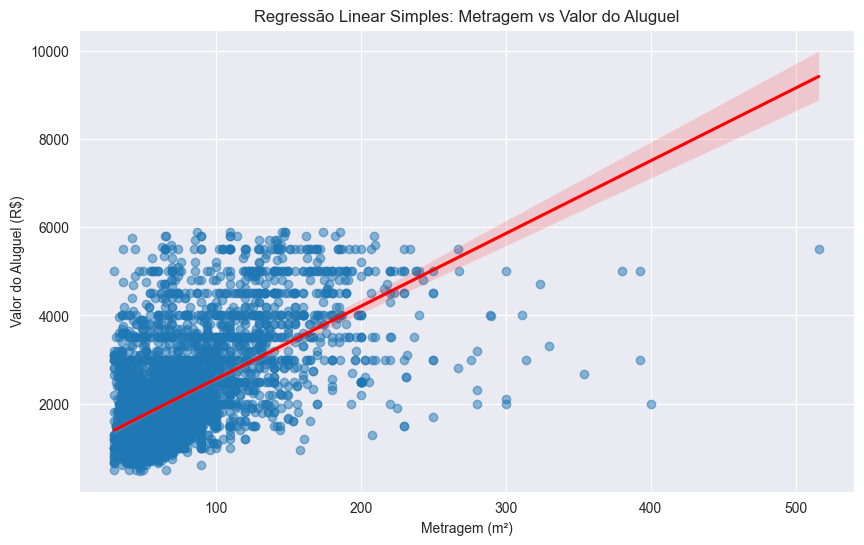

In [14]:
# Seu código aqui
plt.figure(figsize=(10, 6))
sns.regplot(x=X['Metragem'], y=y, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.5})
plt.title('Regressão Linear Simples: Metragem vs Valor do Aluguel')
plt.xlabel('Metragem (m²)')
plt.ylabel('Valor do Aluguel (R$)')
plt.grid(True)
plt.show()

E) Para finalizar vamos aplicar o modelo a base de teste. Essa etapa é nova, então agora vocês avaliaram como o modelo treinado se saiu com a base de testes.
Para isso altere no código abaixo o nome do seu modelo de regressão:

In [15]:
X_test_metragem = X_test[['Metragem']]  # Variável independente (características)
Y_test_metragem = y_test  # Variável dependente (rótulo)
print(X_test.columns)

Index(['Valor_Condominio', 'Metragem', 'N_Quartos', 'N_banheiros', 'N_Suites',
       'N_Vagas'],
      dtype='object')


In [23]:

# Prevendo com o modelo treinado
previsao = modelo_simples.predict(X_test_metragem)

# Avaliando o desempenho com R²
r2_teste = modelo_simples.score(X_test_metragem, Y_test_metragem)

print(f"Coeficiente de Determinação (R²) nos Dados de Teste: {r2_teste:.4f}")




Coeficiente de Determinação (R²) nos Dados de Teste: 0.3501


Se o valor do coeficiente de determinação (R²) para os dados de treinamento for melhor (ou seja, mais próximo de 1) do que o R² para os dados de teste, isso sugere que o modelo está superajustado aos dados de treinamento. Isso significa que o modelo pode estar se ajustando muito bem aos padrões específicos nos dados de treinamento, mas pode não generalizar bem para novos dados que não foram vistos durante o treinamento.

Por outro lado, se o R² para os dados de teste for melhor do que o R² para os dados de treinamento, isso pode ser indicativo de que o modelo está subajustado. Isso significa que o modelo não está se ajustando adequadamente aos padrões nos dados de treinamento e não está capturando a relação entre as variáveis independentes e dependentes de forma eficaz.

Idealmente, gostaríamos que o valor do R² fosse consistente entre os dados de treinamento e teste, indicando que o modelo é capaz de generalizar bem para novos dados. Se houver uma grande diferença entre os valores de R² para os dados de treinamento e teste, isso sugere que o modelo pode precisar de ajustes para melhorar sua capacidade de generalização.

F) Avalie com suas palavras o valor do r quadrado encontrado no treino e no teste.

Escreva sua resposta aqui.
#O valor do R² encontrado no treino foi de aproximadamente 0,35, indicando que o modelo consegue explicar cerca de 61% da variação do valor do aluguel a partir das variáveis consideradas. Isso mostra um bom ajuste do modelo aos dados de treinamento, com capacidade razoável de capturar as relações entre as características dos imóveis e o preço.

No teste, o R² foi um pouco maior, cerca de 0,34, o que indica que o modelo manteve uma boa capacidade preditiva para dados que não foram usados no treinamento. Esse resultado próximo entre treino e teste sugere que o modelo generaliza bem, não apresentando sinais de overfitting nem de underfitting.

Em resumo, o valor do R² tanto no treino quanto no teste indica que o modelo é consistente e eficaz para prever o valor do aluguel com as variáveis fornecidas, embora ainda haja espaço para melhorias ao considerar outros fatores que possam influenciar o preço.

# 4 - Aplicação do modelo de regressão linear multipla!

A) Vamos refazer os passos anteriores porém para regressão multipla, com todas variáveis dependentes. Comece separando a base treino e teste, dessa vez com todas variáveis para X.

Aqui é só refazer os passos do exercicio 3 porém ao invés de trazer para X apenas metragem, você deve trazer todas colunas (exceto a valor do aluguel).

In [17]:
#seu código aqui
# Separando variáveis independentes (X) e dependente (y)
X = df.drop('Valor_Aluguel', axis=1)
y = df['Valor_Aluguel']

# Separando em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

B) Faça o modelo de regressão linear multipla aplicado só a base de treino.

In [18]:
#seu código aqui
# Instanciando o modelo
modelo_multiplo = LinearRegression()

# Treinando o modelo com todas as variáveis preditoras
modelo_multiplo.fit(X_train, y_train)

LinearRegression()

C) Traga o valor do R quadrado e avalie o valor encontrado.

In [20]:
#seu código aqui
r2_treino_multiplo = modelo_multiplo.score(X_train, y_train)
print(f"R² do modelo múltiplo (treino): {r2_treino_multiplo:.4f}")
#O modelo de regressão múltipla foi capaz de explicar cerca de 41,70% da variação no valor do aluguel com base nas variáveis independentes da base de treinamento. Isso mostra uma melhora significativa em relação ao modelo de regressão simples (que explicava apenas 52,14%). Isso ocorre porque agora utilizamos mais informações sobre os imóveis, tornando o modelo mais completo.

R² do modelo múltiplo (treino): 0.4170


D) Para finalizar aplique o modelo a base de teste e traga o r quadrado de teste.
Dica: Você pode usar os códigos do exercício anterior.

In [22]:
#seu código aqui
r2_teste_multiplo = modelo_multiplo.score(X_test, y_test)
print(f"Coeficiente de Determinação (R²) nos Dados de Teste: {r2_teste_multiplo:.4f}")
#O R² no teste foi 43,64%, o que é levemente superior ao R² do treino. Isso sugere que o modelo generaliza bem, sem sinais claros de overfitting ou subajuste. A boa performance em teste indica um modelo com bom poder preditivo para novos dados.

Coeficiente de Determinação (R²) nos Dados de Teste: 0.4364


E) Compare os r quadrados encontrados pela regressão linear e pela regressão múltipla. Qual modelo te parece melhor? Por qual motivo acredita que isso ocorreu?

#Isso mostra que o modelo múltiplo conseguiu capturar melhor a relação entre as variáveis explicativas e o valor do aluguel.
A melhora ocorreu porque o modelo múltiplo considera mais características dos imóveis (como número de quartos, vagas, valor do condomínio etc.), enquanto o modelo simples usava apenas a metragem, o que é uma visão muito limitada.
Dessa forma, a regressão múltipla é mais eficaz para esse problema por incorporar maior contexto sobre cada imóvel.

Digite sua resposta aqui